In [1]:
from pygenomeviz import GenomeViz
from pygenomeviz.parser import Gff

In [4]:
tensor_file = "tensors/gene_seqs.safetensors"
real_gff_path = "seqs/gene_seqs.gff3"
hint_gff_path = "../test_geneid/gene_seqs_hint.gff3"

In [54]:
real_gff = Gff(real_gff_path)
hint_gff = Gff(hint_gff_path)

In [8]:
real_gff

In [65]:
sizes = {"human_hbb": 1980,"mouse_rpl27": 3432, "turtle_nr0b1": 3189, "xenopus_cytl1": 3665, "danio_yipf5": 8406, "drosophila_fnta": 1680, "yeast_uso1": 5573}


In [84]:
gv = GenomeViz()
gv.set_scale_bar(ymargin=0.5)

In [85]:
for seqid, size in real_gff.get_seqid2size().items():
    real_track = gv.add_feature_track(seqid + "_real", sizes[seqid], labelsize=15)
    llm_track = gv.add_feature_track(seqid + "_llm", sizes[seqid], labelsize=15)
    
    real_track.add_sublabel(size=10, color="grey")
    llm_track.add_sublabel(size=10, color="grey")
    
    real_features = real_gff.get_seqid2features(feature_type="CDS")[seqid]
    llm_features = hint_gff.get_seqid2features(feature_type="CDS")[seqid]

    for cds_feature in real_features:
        real_track.add_features(cds_feature, plotstyle="box", color="#9f4a54")

    for cds_feature in llm_features:
        llm_track.add_features(cds_feature, plotstyle="box", color="#ab81cd")

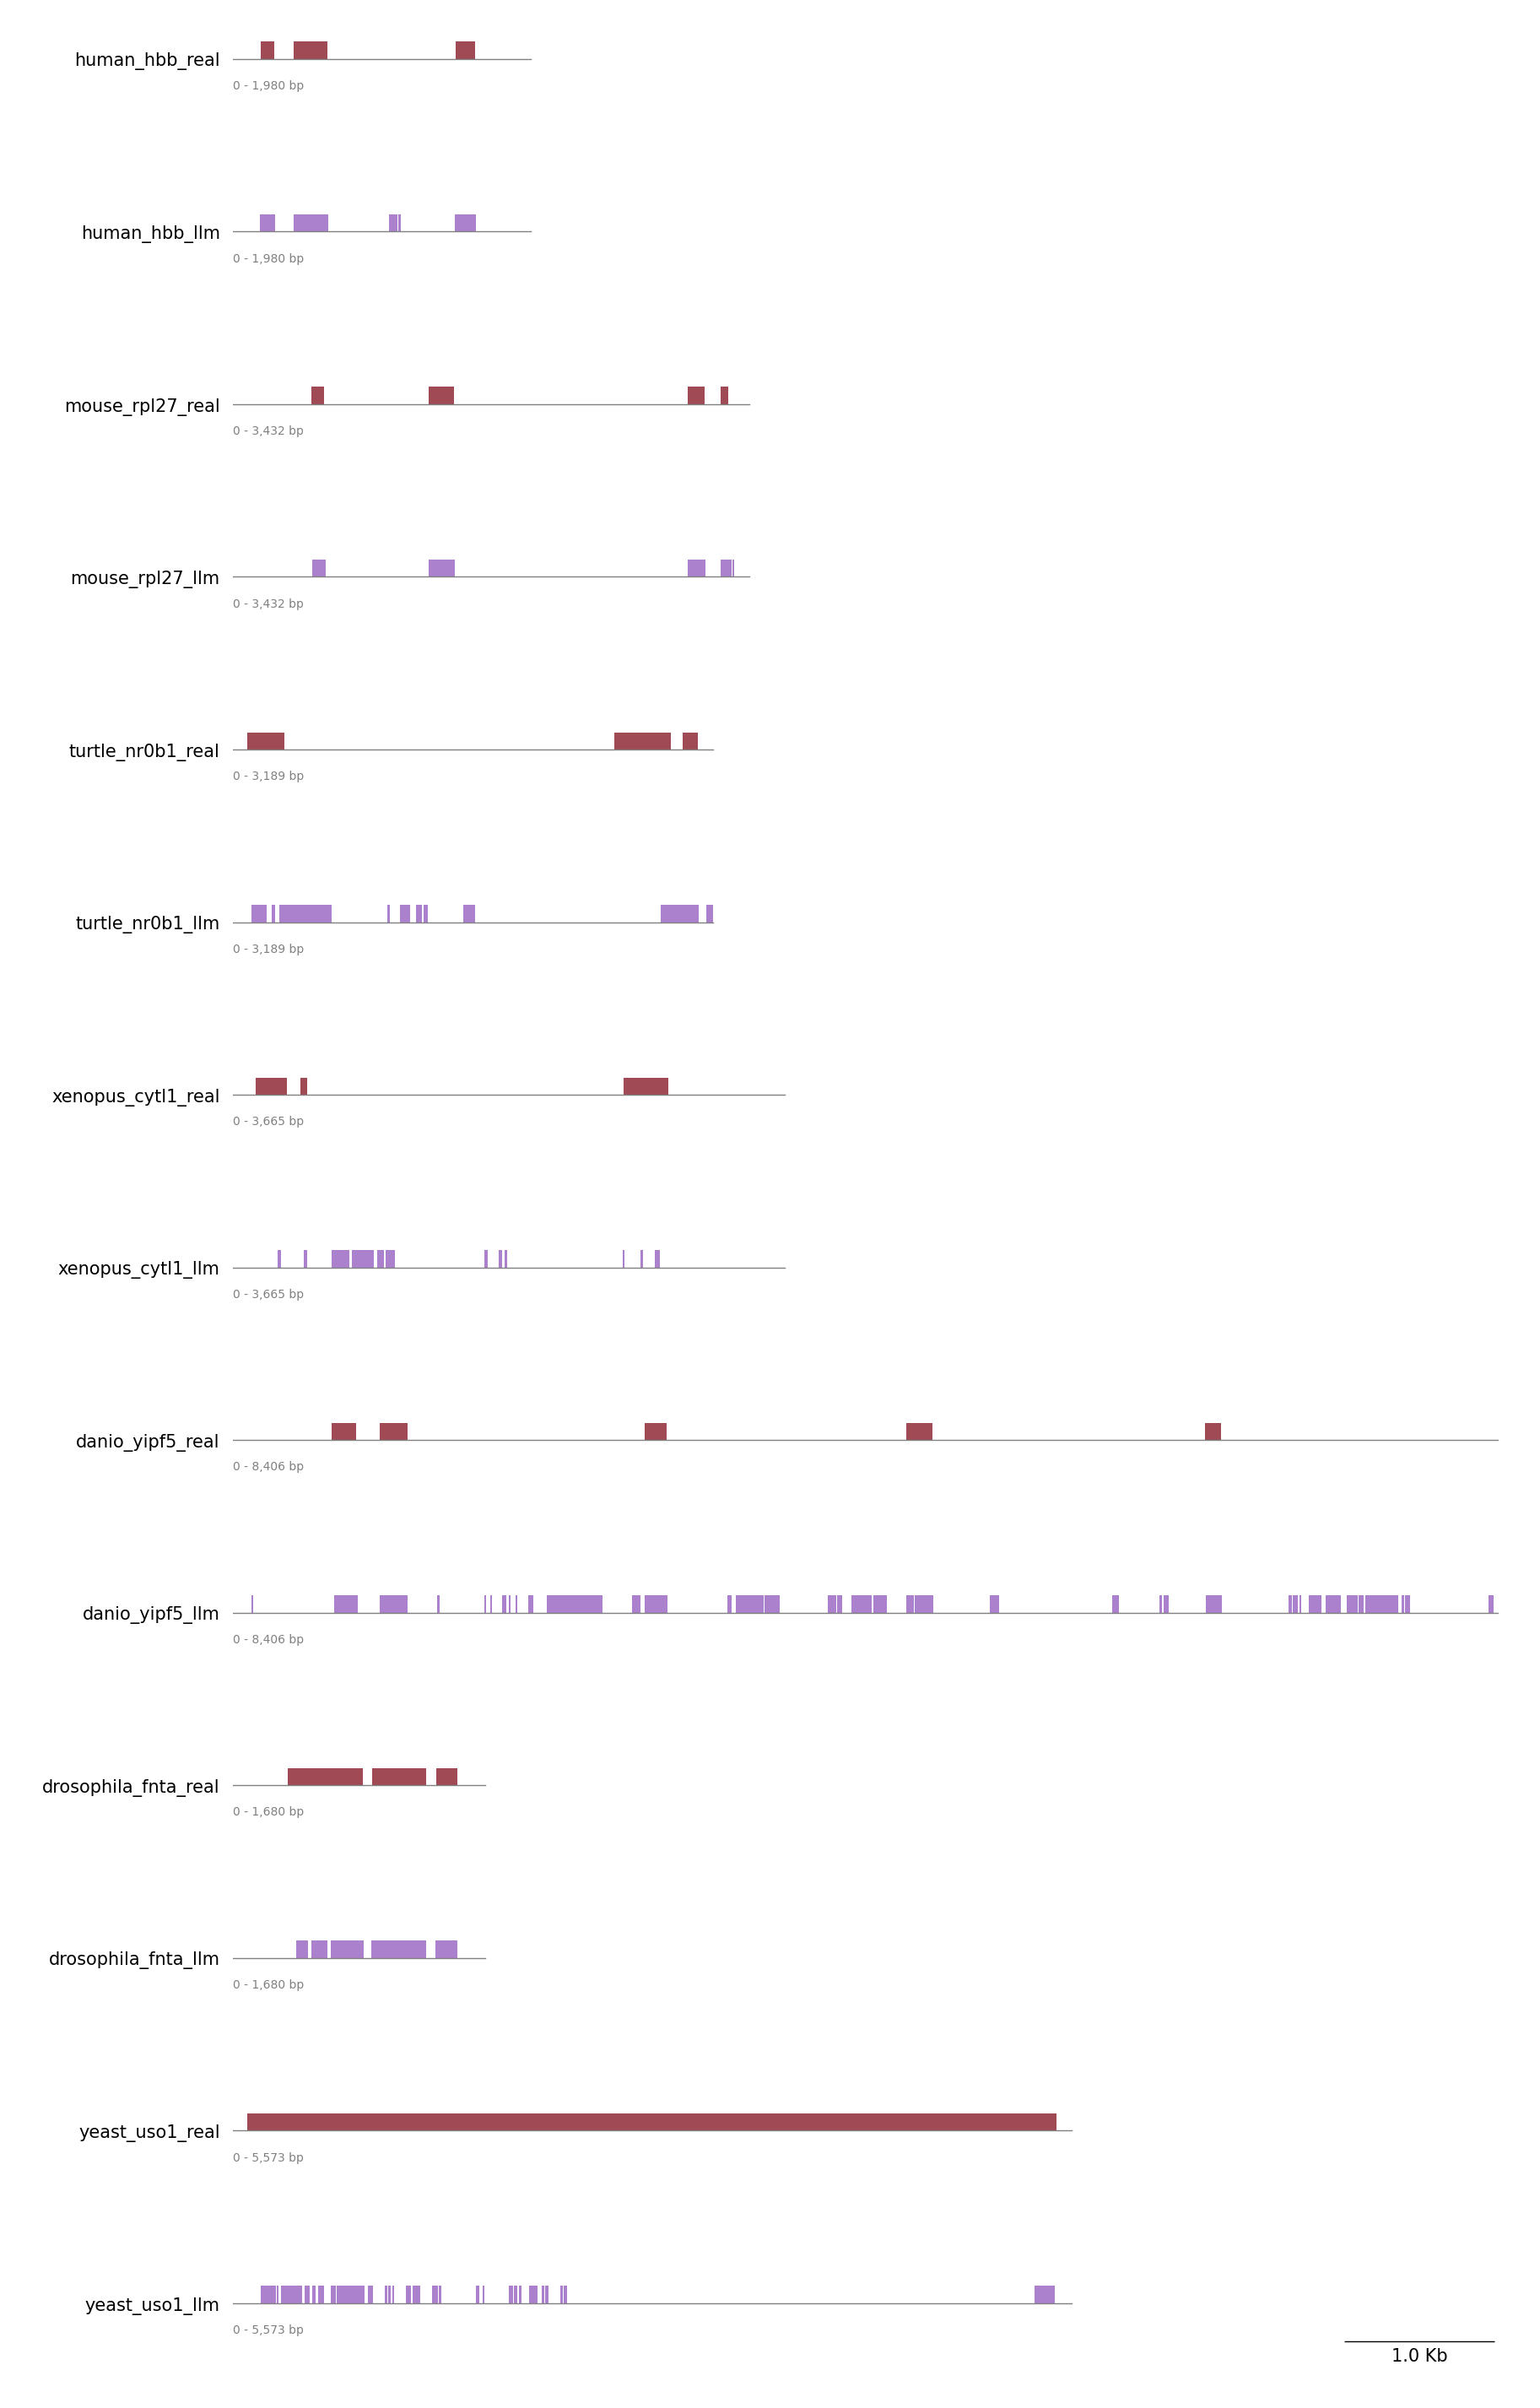

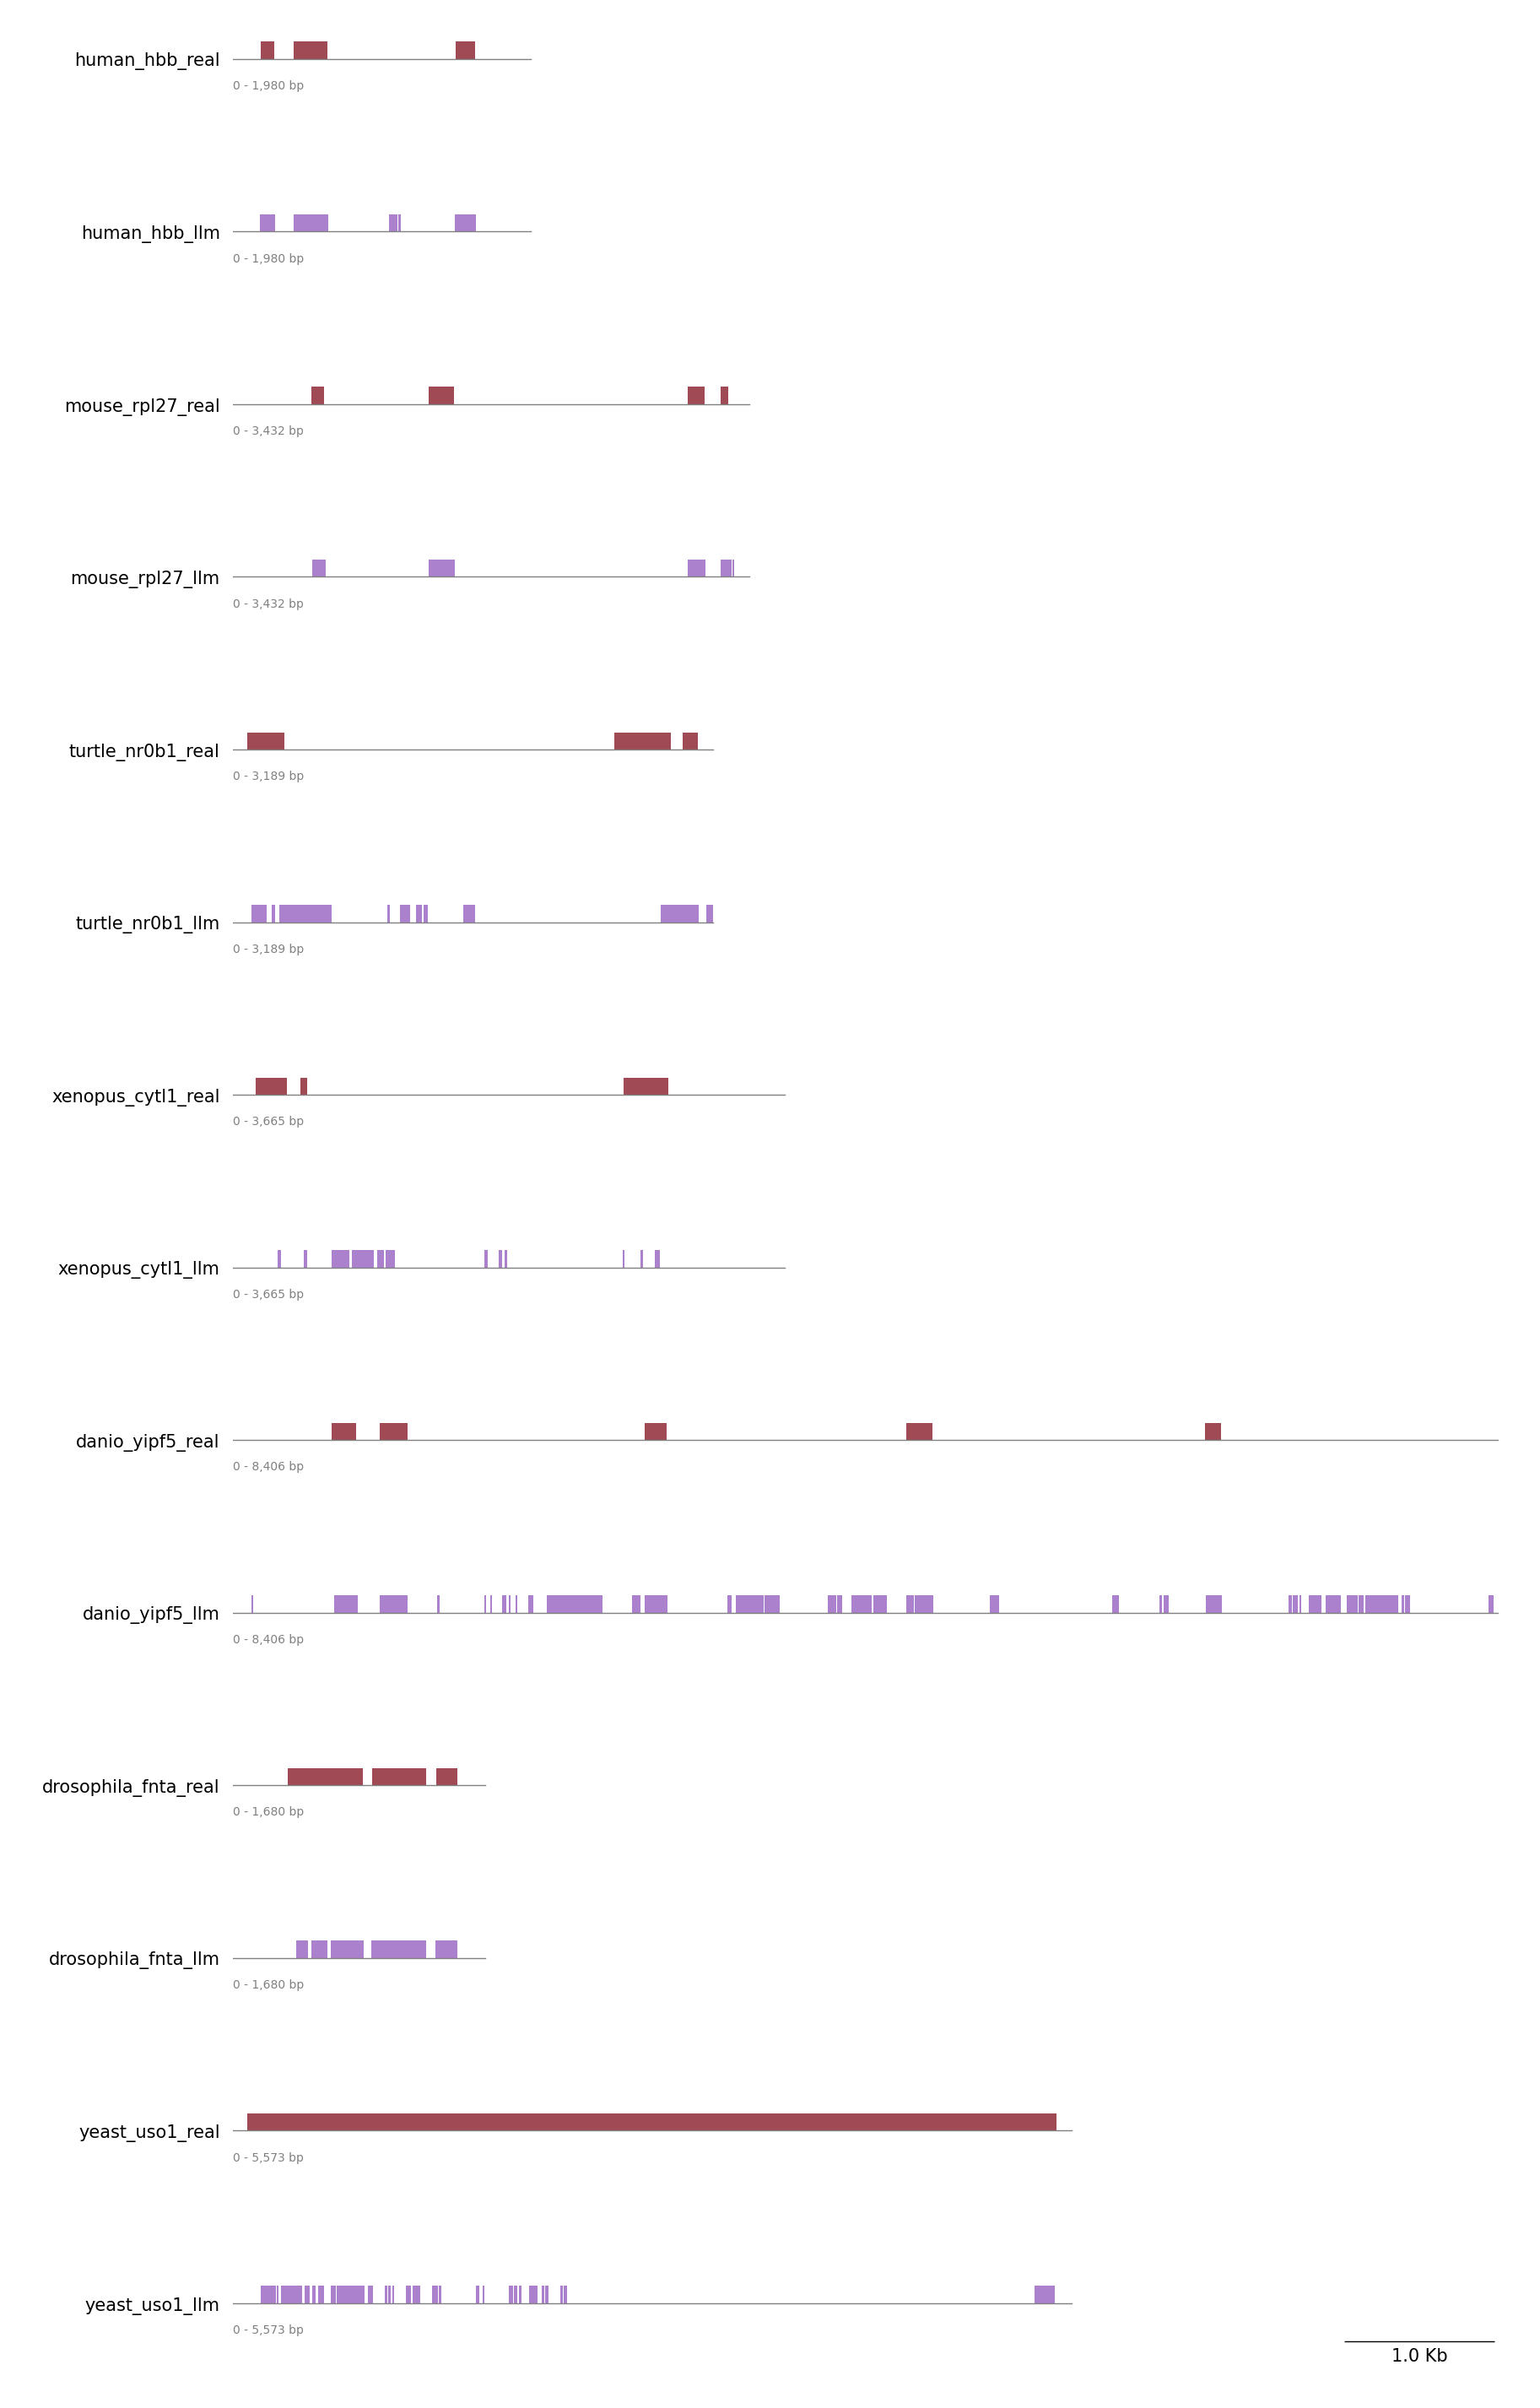

In [86]:
gv.plotfig()

In [45]:
real_gff.get_seqid2size()

{'human_hbb': 1610,
 'mouse_rpl27': 3289,
 'turtle_nr0b1': 3088,
 'xenopus_cytl1': 2891,
 'danio_yipf5': 6566,
 'drosophila_fnta': 1493,
 'yeast_uso1': 5472}